# Terzaghi 1D Consolidation (Multi-layer) using FEniCSx

This notebook implements Terzaghi’s one-dimensional consolidation equation for a **multi-layer soil profile** using the finite element method (FEM) in FEniCSx.  
The main objective is to compute the evolution of excess pore pressure and consolidation settlement for layered soils, and to provide outputs suitable for plotting (settlement curves, heatmaps, error metrics where applicable).

Because a full closed-form analytical solution is not available for all multi-layer cases considered here, verification is performed using a combination of:
- the **single-layer analytical solution** (uniform initial excess pore pressure) as a baseline reference for simplified cases, and/or
- **internal consistency checks** (mass balance trends, expected boundary behaviour, convergence with mesh/time-step refinement), and/or
- comparison against alternative numerical references where available (e.g. simplified implementations or commercial software outputs).

## Problem definition

A vertically layered soil profile is modelled from the ground surface to depth \(H\).  
Each layer is assigned its own consolidation properties (e.g. \(C_v\), \(m_v\)).  
Single drainage conditions are only considered and the initial excess pore pressure distribution are defined consistently within the model inputs.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



# set up to allow juypter notebook to use local modulse from src 
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts'))
sys.path.insert(0, module_path)

from terazaghi_1d.analytical import Get_Terazaghi1d_Analytical
from terazaghi_1d_multilayer.mfea_fenics import Get_Terazaghi1dMultilayer_FEA



In [2]:
# Embankment properties
Load = 100 # load (kPa)
Base = 10 # embankment width (m)
 
num = 100
nodes = num + 1

name = ["Made ground", "Soft clay", "Firm clay"]
depths = [1, 2, 4, 5]
Cv = [2e-7,2e-7, 2e-7, 2e-7] # this is Cv 
Mv = [5e-4, 10e-4, 5e-4, 5e-4]




# for analytical modell 
aCv = 2e-7 # m^2/s (coefficient of consolidation)
# Mv = 5e-4 # 1/kPa  (or m^2/kN)

# n terms for analitical solution 
N_terms = 200

H = np.max(depths)

T = (60*60*24) * 365 # final time (days)
time_steps = 1000




In [3]:

fem_cdata, fem_udata, settlement = Get_Terazaghi1dMultilayer_FEA(depths, num, Load, T, time_steps, Cv,Mv, Base = 10, U0=True)
Z = -np.linspace(0, np.max(depths), num = nodes)
time = np.linspace(0,(T/(60*60*24)), num= time_steps)
fem_cdata = pd.DataFrame(fem_cdata, columns = Z, index = time)

fem_cdata

/workspaces/Geotechnical-Consolidation-FEM-1/scripts/terazaghi_1d_multilayer/mfea_fenics.py:205: RuntimeWarning: invalid value encountered in divide
  local_dcons = 1 - u_hist / u0[None,:]


,-0.00,-0.05,-0.10,-0.15,-0.20,-0.25,-0.30,-0.35,-0.40,-0.45,...,-4.55,-4.60,-4.65,-4.70,-4.75,-4.80,-4.85,-4.90,-4.95,-5.00
0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.365365,1.0,0.564475,0.297604,0.156903,0.082723,0.043613,0.022994,0.012123,0.006391,0.003370,...,0.000000,0.000000e+00,3.330669e-16,3.330669e-16,3.330669e-16,3.330669e-16,1.110223e-16,0.000000e+00,0.000000e+00,0.000000e+00
0.730731,1.0,0.711680,0.473852,0.301829,0.186549,0.112808,0.067096,0.039393,0.022887,0.013183,...,0.000000,1.110223e-16,4.440892e-16,5.551115e-16,6.661338e-16,5.551115e-16,3.330669e-16,1.110223e-16,0.000000e+00,0.000000e+00
1.096096,1.0,0.773940,0.570709,0.403890,0.276331,0.183900,0.119628,0.076356,0.047963,0.029720,...,0.000000,1.110223e-16,4.440892e-16,6.661338e-16,8.881784e-16,6.661338e-16,5.551115e-16,4.440892e-16,3.330669e-16,3.330669e-16
1.461461,1.0,0.808719,0.630570,0.475226,0.347352,0.247106,0.171667,0.116806,0.078042,0.051314,...,0.000000,1.110223e-16,4.440892e-16,6.661338e-16,8.881784e-16,6.661338e-16,5.551115e-16,4.440892e-16,4.440892e-16,4.440892e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363.538539,1.0,0.989163,0.978330,0.967501,0.956682,0.945873,0.935079,0.924302,0.913544,0.902809,...,0.323275,3.218725e-01,3.206343e-01,3.195606e-01,3.186517e-01,3.179078e-01,3.173291e-01,3.169156e-01,3.166675e-01,3.165848e-01
363.903904,1.0,0.989170,0.978344,0.967523,0.956710,0.945909,0.935122,0.924351,0.913601,0.902873,...,0.323689,3.222873e-01,3.210497e-01,3.199766e-01,3.190682e-01,3.183247e-01,3.177463e-01,3.173330e-01,3.170850e-01,3.170024e-01
364.269269,1.0,0.989178,0.978358,0.967544,0.956739,0.945944,0.935164,0.924401,0.913657,0.902936,...,0.324103,3.227019e-01,3.214649e-01,3.203924e-01,3.194844e-01,3.187413e-01,3.181632e-01,3.177502e-01,3.175023e-01,3.174197e-01
364.634635,1.0,0.989185,0.978372,0.967565,0.956767,0.945980,0.935207,0.924451,0.913714,0.903000,...,0.324517,3.231163e-01,3.218800e-01,3.208080e-01,3.199005e-01,3.191578e-01,3.185799e-01,3.181671e-01,3.179194e-01,3.178368e-01


In [4]:

# analytical solution plotitng 
analytical_cdata, a_Z, = Get_Terazaghi1d_Analytical(H, T, time_steps, num, aCv, N_terms)
a_T = np.linspace(0, Tx/(60*60*24), time_steps, dtype=float)
analytical_cdata = pd.DataFrame(analytical_cdata, columns= -a_Z, index= a_T)

analytical_cdata


TypeError: Get_Terazaghi1d_Analytical() missing 1 required positional argument: 'n_terms'

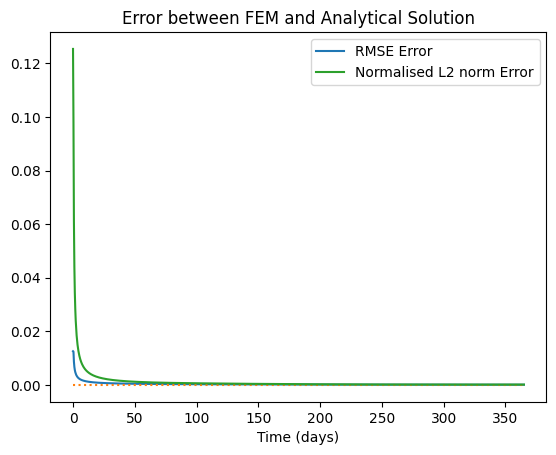

In [ ]:
# assumes that the t and z for both data is identical in which it is 
error = fem_cdata - analytical_cdata
#RMSE error per time step 
RMSE = np.sqrt((error**2).mean(axis = 1))
# Normalised L2 norm error 
num = (error**2).sum(axis = 1)
den = (analytical_cdata**2).sum(axis = 1)
E_L2 = np.sqrt(num / (den+ 1e-12))
time = np.linspace(0, (Tx/(60*60*24)), time_steps)


# plotting err
plt.figure()
plt.plot(time, RMSE, label = "RMSE Error")
plt.plot([0,np.max(time)],[0,0], linestyle ="dotted")  # Please change for capture of map
plt.plot(time, E_L2, label = "Normalised L2 norm Error")
plt.xlabel("Time (days)")
plt.legend()
plt.title("Error between FEM and Analytical Solution")
plt.show()


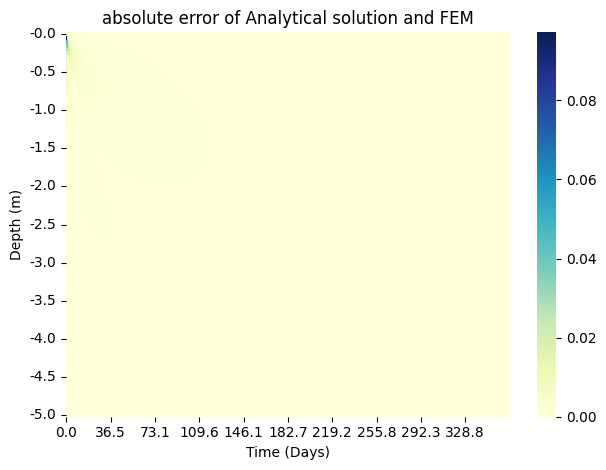

In [ ]:
time = time
depth = Z

kx = max(1, len(time)//10)    # ~8 labels across, auto
ky = max(1, len(depth)//10)  # ~10 labels down, auto 


ax = sns.heatmap(abs(error).T, annot=False, cmap="YlGnBu", 
                 xticklabels=time, yticklabels=depth)

ax.set_xticks(np.arange(0, len(time), kx) + 0.5)
ax.set_xticklabels([f"{time[i]:.1f}" for i in range(0, len(time), kx)],
                   rotation=0)

ax.set_yticks(np.arange(0, len(depth), ky) + 0.5)
ax.set_yticklabels([f"{depth[i]:.1f}" for i in range(0, len(depth), ky)],
                   rotation=0)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Depth (m)")
ax.set_title("absolute error of Analytical solution and FEM")
plt.tight_layout()
plt.show()
